In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_url = "https://goo.gl/ioc2Td"
df = pd.read_csv(data_url)
df.head()

,continent,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007,lifeExp_1952,lifeExp_1957,lifeExp_1962,lifeExp_1967,lifeExp_1972,lifeExp_1977,lifeExp_1982,lifeExp_1987,lifeExp_1992,lifeExp_1997,lifeExp_2002,lifeExp_2007,pop_1952,pop_1957,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
0,Africa,Algeria,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,5023.216647,4797.295051,5288.040382,6223.367465,43.077,45.685,48.303,51.407,54.518,58.014,61.368,65.799,67.744,69.152,70.994,72.301,9279525.0,10270856.0,11000948.0,12760499.0,14760787.0,17152804.0,20033753.0,23254956.0,26298373.0,29072015.0,31287142,33333216
1,Africa,Angola,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,2627.845685,2277.140884,2773.287312,4797.231267,30.015,31.999,34.000,35.985,37.928,39.483,39.942,39.906,40.647,40.963,41.003,42.731,4232095.0,4561361.0,4826015.0,5247469.0,5894858.0,6162675.0,7016384.0,7874230.0,8735988.0,9875024.0,10866106,12420476
2,Africa,Benin,1062.752200,959.601080,949.499064,1035.831411,1085.796879,1029.161251,1277.897616,1225.856010,1191.207681,1232.975292,1372.877931,1441.284873,38.223,40.358,42.618,44.885,47.014,49.190,50.904,52.337,53.919,54.777,54.406,56.728,1738315.0,1925173.0,2151895.0,2427334.0,2761407.0,3168267.0,3641603.0,4243788.0,4981671.0,6066080.0,7026113,8078314
3,Africa,Botswana,851.241141,918.232535,983.653976,1214.709294,2263.611114,3214.857818,4551.142150,6205.883850,7954.111645,8647.142313,11003.605080,12569.851770,47.622,49.618,51.520,53.298,56.024,59.319,61.484,63.622,62.745,52.556,46.634,50.728,442308.0,474639.0,512764.0,553541.0,619351.0,781472.0,970347.0,1151184.0,1342614.0,1536536.0,1630347,1639131
4,Africa,Burkina Faso,543.255241,617.183465,722.512021,794.826560,854.735976,743.387037,807.198586,912.063142,931.752773,946.294962,1037.645221,1217.032994,31.975,34.906,37.814,40.697,43.591,46.137,48.122,49.557,50.260,50.324,50.650,52.295,4469979.0,4713416.0,4919632.0,5127935.0,5433886.0,5889574.0,6634596.0,7586551.0,8878303.0,10352843.0,12251209,14326203


In [4]:
df.shape

(142, 38)

In [3]:
df.columns

Index(['continent', 'country', 'gdpPercap_1952', 'gdpPercap_1957',
       'gdpPercap_1962', 'gdpPercap_1967', 'gdpPercap_1972', 'gdpPercap_1977',
       'gdpPercap_1982', 'gdpPercap_1987', 'gdpPercap_1992', 'gdpPercap_1997',
       'gdpPercap_2002', 'gdpPercap_2007', 'lifeExp_1952', 'lifeExp_1957',
       'lifeExp_1962', 'lifeExp_1967', 'lifeExp_1972', 'lifeExp_1977',
       'lifeExp_1982', 'lifeExp_1987', 'lifeExp_1992', 'lifeExp_1997',
       'lifeExp_2002', 'lifeExp_2007', 'pop_1952', 'pop_1957', 'pop_1962',
       'pop_1967', 'pop_1972', 'pop_1977', 'pop_1982', 'pop_1987', 'pop_1992',
       'pop_1997', 'pop_2002', 'pop_2007'],
      dtype='object')

In [9]:
df.continent.unique()

array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype=object)

In [10]:
lifeExp = df.loc[:, df.columns.str.contains('^life')]
lifeExp.head()

,lifeExp_1952,lifeExp_1957,lifeExp_1962,lifeExp_1967,lifeExp_1972,lifeExp_1977,lifeExp_1982,lifeExp_1987,lifeExp_1992,lifeExp_1997,lifeExp_2002,lifeExp_2007
0,43.077,45.685,48.303,51.407,54.518,58.014,61.368,65.799,67.744,69.152,70.994,72.301
1,30.015,31.999,34.000,35.985,37.928,39.483,39.942,39.906,40.647,40.963,41.003,42.731
2,38.223,40.358,42.618,44.885,47.014,49.190,50.904,52.337,53.919,54.777,54.406,56.728
3,47.622,49.618,51.520,53.298,56.024,59.319,61.484,63.622,62.745,52.556,46.634,50.728
4,31.975,34.906,37.814,40.697,43.591,46.137,48.122,49.557,50.260,50.324,50.650,52.295


In [12]:
lifeExp.shape, lifeExp.columns

((142, 12),
 Index(['lifeExp_1952', 'lifeExp_1957', 'lifeExp_1962', 'lifeExp_1967',
        'lifeExp_1972', 'lifeExp_1977', 'lifeExp_1982', 'lifeExp_1987',
        'lifeExp_1992', 'lifeExp_1997', 'lifeExp_2002', 'lifeExp_2007'],
       dtype='object'))

In [11]:
lifeExp_meta = df.loc[:, df.columns.str.contains('^c')]
lifeExp_meta.head()

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina Faso


In [14]:
lifeExp_meta.shape, lifeExp_meta.continent.unique()

((142, 2),
 array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype=object))

In [18]:
grp = lifeExp_meta.groupby('continent').agg(lambda x: x.tolist())
grp

,country
continent,
Africa,"[Algeria, Angola, Benin, Botswana, Burkina Fas..."
Americas,"[Argentina, Bolivia, Brazil, Canada, Chile, Co..."
Asia,"[Afghanistan, Bahrain, Bangladesh, Cambodia, C..."
Europe,"[Albania, Austria, Belgium, Bosnia and Herzego..."
Oceania,"[Australia, New Zealand]"


In [20]:
lifeExp_scaled = (lifeExp-lifeExp.mean())/lifeExp.std()
lifeExp_scaled.head()

,lifeExp_1952,lifeExp_1957,lifeExp_1962,lifeExp_1967,lifeExp_1972,lifeExp_1977,lifeExp_1982,lifeExp_1987,lifeExp_1992,lifeExp_1997,lifeExp_2002,lifeExp_2007
0,-0.489174,-0.476025,-0.438633,-0.364480,-0.274943,-0.138606,-0.015338,0.245009,0.319190,0.357917,0.431527,0.438463
1,-1.557557,-1.594959,-1.620968,-1.680479,-1.732513,-1.789146,-2.004639,-2.207842,-2.094285,-2.080696,-2.010772,-2.010799
2,-0.886198,-0.911548,-0.908575,-0.921019,-0.934232,-0.924552,-0.986870,-1.030250,-0.912175,-0.885655,-0.919307,-0.851438
3,-0.117424,-0.154473,-0.172705,-0.203116,-0.142628,-0.022370,-0.004568,0.038781,-0.126061,-1.077792,-1.552215,-1.348413
4,-1.397242,-1.357290,-1.305690,-1.278392,-1.234971,-1.196480,-1.245165,-1.293600,-1.238075,-1.270881,-1.225174,-1.218620


In [25]:
lifeExp_scaled.describe()

,lifeExp_1952,lifeExp_1957,lifeExp_1962,lifeExp_1967,lifeExp_1972,lifeExp_1977,lifeExp_1982,lifeExp_1987,lifeExp_1992,lifeExp_1997,lifeExp_2002,lifeExp_2007
count,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02
mean,1.978073e-15,1.035166e-15,-1.454236e-15,-5.957676e-16,-1.724755e-15,5.003822e-16,1.014838e-15,-4.143790e-16,2.017166e-15,-4.550351e-16,-1.804503e-15,-7.255542e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.656854e+00,-1.731249e+00,-1.786543e+00,-1.848157e+00,-1.954619e+00,-2.525125e+00,-2.143628e+00,-2.207842e+00,-3.612716e+00,-2.502516e+00,-2.158168e+00,-2.269061e+00
25%,-8.178191e-01,-8.388244e-01,-8.382693e-01,-8.229931e-01,-8.036526e-01,-8.100536e-01,-7.978370e-01,-7.835960e-01,-7.159808e-01,-8.115382e-01,-8.284055e-01,-8.156345e-01
50%,-3.208027e-01,-2.572829e-01,-2.255265e-01,-1.581459e-01,-9.817177e-02,9.071030e-03,8.433154e-02,2.483248e-01,3.155377e-01,3.788526e-01,4.178055e-01,4.081893e-01
75%,8.757909e-01,9.426113e-01,9.609833e-01,1.001907e+00,1.019167e+00,9.630464e-01,8.716355e-01,8.208036e-01,7.501449e-01,7.919998e-01,7.951522e-01,7.790782e-01
max,1.931332e+00,1.795608e+00,1.659118e+00,1.577091e+00,1.499972e+00,1.473190e+00,1.446231e+00,1.464283e+00,1.353803e+00,1.356063e+00,1.327794e+00,1.291771e+00


### Perform SVD

In [26]:
U, S, Vh = np.linalg.svd(lifeExp_scaled, full_matrices=True)

U.shape, S.shape, Vh.shape

((142, 142), (12,), (12, 12))

The output of SVD is three matrices, **u, s,** and **v**. The matrices **u** and **v** are singular vectors and **s** is singular values.

Singular values help us compute variance explained by each singular vectors. We can visualize the percent variance explained by each singular vector or PC to understand the structure in the data.

In [27]:
variance = np.round(S**2/np.sum(S**2), decimals=3)
variance

array([0.923, 0.056, 0.013, 0.004, 0.001, 0.001, 0.001, 0.   , 0.   ,
       0.   , 0.   , 0.   ])

Text(0, 0.5, 'Percent Variance')

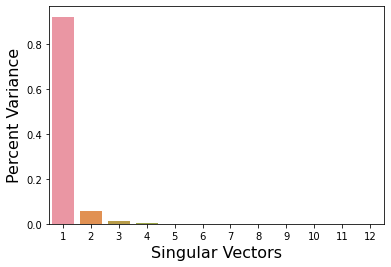

In [30]:
sns.barplot(x = list(range(1, len(variance)+1)),
            y = variance)
plt.xlabel('Singular Vectors', fontsize=16)
plt.ylabel('Percent Variance', fontsize=16)

Here we can notice that first vector explains most of the variation in the data.

In [41]:
labels = ['SV'+str(i) for i in range(1,3)]

svd_df = pd.DataFrame(U[:, 0:2], index=lifeExp_meta["continent"].tolist(), columns=labels).reset_index()
svd_df.rename(columns={'index':'continent'}, inplace=True)
svd_df.head()

,continent,SV1,SV2
0,Africa,-0.003304,-0.124424
1,Africa,-0.163392,0.073616
2,Africa,-0.080913,0.002117
3,Africa,-0.034673,0.151913
4,Africa,-0.111435,-0.005616


In [42]:
svd_df.shape

(142, 3)

In [46]:
svd_df.describe()

,SV1,SV2
count,1.420000e+02,1.420000e+02
mean,-2.062122e-17,1.002719e-16
std,8.421519e-02,8.421519e-02
min,-1.720777e-01,-2.259003e-01
25%,-7.304805e-02,-6.391632e-02
50%,9.905106e-04,2.322110e-03
75%,7.929859e-02,6.025766e-02
max,1.283310e-01,2.340122e-01


In [47]:
svd_df.continent.unique().tolist()

['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

Text(0, 0.5, 'SV 2: 5.6000000000000005%')

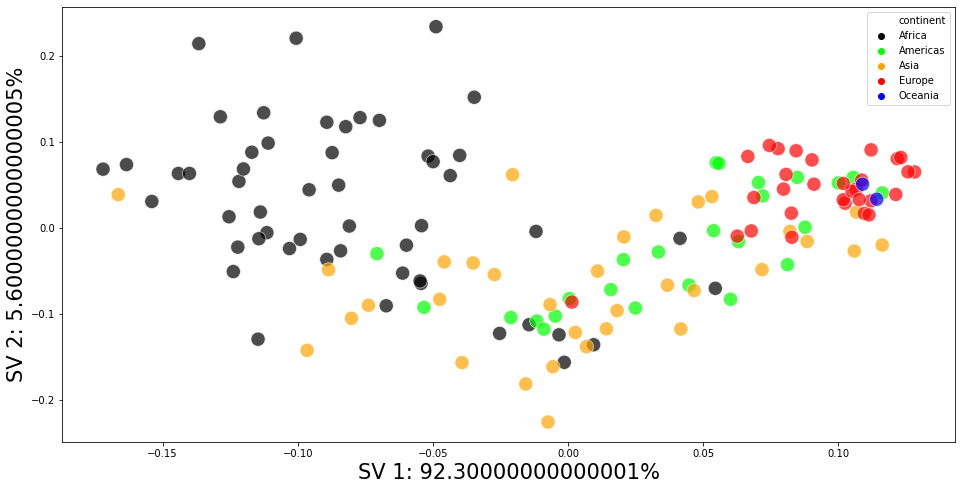

In [59]:
plt.figure(figsize=[16,8])

colour_dict = dict({
    'Africa': 'Black',
    'Americas': 'lime',
    'Asia': 'orange',
    'Europe': 'Red',
    'Oceania': 'Blue'
})

sns.scatterplot(x='SV1', 
                y='SV2',
                hue='continent',
                palette=colour_dict,
                data=svd_df,
                s=200,
                alpha=0.7)

plt.xlabel('SV 1: {0}%'.format(variance[0]*100), fontsize=21)
plt.ylabel('SV 2: {0}%'.format(variance[1]*100), fontsize=21)